<a href="https://colab.research.google.com/github/grupo21dex/deliverable-1/blob/main/tratando_dados_deliverable1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primeiro Deliverable
#Projeto Roof Imóveis


#Determinar as 5 melhores e as 5 piores opções de compra explicando o porque

#Analisar os imóveis que foram vendidos mais de uma vez e usar como régua para avaliarmos os melhores imóveis

In [134]:
#bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import geopy


#Adicionando uma coluna 'address' com o endereço das residencias 

In [135]:
#DataFrame
#dados = pd.read_csv('kc_house_data.csv')
#dados


In [ ]:
# localizar o endereço dado latitude e longitude:geolocator.reverse(Latitude+","+Longitude)
#controle
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
#address = geolocator.reverse(str(dados['lat'][0])+','+str(dados['long'][0]))
#print(address)

10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States


In [ ]:
#determina o endereço dado a latitude e longitude e cria a coluna address com os endereços (DEMOROU 3 HORAS!!!!)
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
#address = list()
#for x in dados.index:
 # address.append(geolocator.reverse(str(dados['lat'][x])+','+str(dados['long'][x])))
#dados['address'] = address

In [ ]:
#salvei um novo dataframe para não ter que carregar o endereço de novo
#dados.to_excel("df_cende.xlsx")

In [136]:
#dataframe com o endereço
df = pd.read_excel('df_cende.xlsx')
df.head(2)

Unnamed: 0          id             date   price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900         3       1.00   
1           1  6414100192  20141209T000000  538000         3       2.25   

   sqft_living  sqft_lot  floors  waterfront  ...  sqft_above  sqft_basement  \
0         1180      5650     1.0           0  ...        1180              0   
1         2570      7242     2.0           0  ...        2170            400   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15                                            address  
0        5650  10012, 61st Avenue South, Rainier Beach, Seatt...  
1        7639  837, Northeast 127th Street, Northgate, Seattl...  

[2 rows x 23 columns]

# Separar o endereço em numero , 'number','street','district','city','county', 'state','number2','country','x','y'

In [137]:
df['address'].str.split(',', expand=True)

0                             1                2             3  \
0      10012             61st Avenue South    Rainier Beach       Seattle   
1        837        Northeast 127th Street        Northgate       Seattle   
2      15109         81st Avenue Northeast        Moorlands       Kenmore   
3       9236      Fauntleroy Way Southwest       Fauntleroy       Seattle   
4        923        221st Avenue Northeast        Sammamish   King County   
...      ...                           ...              ...           ...   
21608    927             North 97th Street   Licton Springs     Greenwood   
21609   2211         Southwest 103rd Place     White Center       Seattle   
21610    902             26th Avenue South           Leschi       Seattle   
21611   2136   Northwest Boulder Way Drive            Talus      Issaquah   
21612    916             26th Avenue South           Leschi       Seattle   

                  4             5               6               7  \
0       King County    Washington           98178   United States   
1       King County    Washington           98125   United States   
2       King County    Washington           98028   United States   
3       King County    Washington           98136   United States   
4        Washington         98074   United States            None   
...             ...           ...             ...             ...   
21608       Seattle   King County      Washington           98103   
21609   King County    Washington           98146   United States   
21610   King County    Washington           98144   United States   
21611   King County    Washington           98027   United States   
21612   King County    Washington           98144   United States   

                    8     9  
0                None  None  
1                None  None  
2                None  None  
3                None  None  
4                None  None  
...               ...   ...  
21608   United States  None  
21609            None  None  
21610            None  None  
21611            None  None  
21612            None  None  

[21613 rows x 10 columns]

#Adicionando colunas

#Separação do endereço

In [138]:
df[['number','street','district','city','county', 'state','number2','country','x','y']] = df['address'].str.split(',', expand=True)
df.tail(2)

Unnamed: 0          id             date   price  bedrooms  bathrooms  \
21611       21611   291310100  20150116T000000  400000         3       2.50   
21612       21612  1523300157  20141015T000000  325000         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  ...  number  \
21611         1600      2388     2.0           0  ...    2136   
21612         1020      1076     2.0           0  ...     916   

                             street  district       city        county  \
21611   Northwest Boulder Way Drive     Talus   Issaquah   King County   
21612             26th Avenue South    Leschi    Seattle   King County   

             state  number2         country     x     y  
21611   Washington    98027   United States  None  None  
21612   Washington    98144   United States  None  None  

[2 rows x 33 columns]

#Preço por area

In [139]:
#preço/areaterreno
df['price/lot'] = df['price'] / df['sqft_lot']
df.head(2)

Unnamed: 0          id             date   price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900         3       1.00   
1           1  6414100192  20141209T000000  538000         3       2.25   

   sqft_living  sqft_lot  floors  waterfront  ...                   street  \
0         1180      5650     1.0           0  ...        61st Avenue South   
1         2570      7242     2.0           0  ...   Northeast 127th Street   

         district      city        county        state  number2  \
0   Rainier Beach   Seattle   King County   Washington    98178   
1       Northgate   Seattle   King County   Washington    98125   

          country     x     y  price/lot  
0   United States  None  None  39.274336  
1   United States  None  None  74.288870  

[2 rows x 34 columns]

In [140]:
#preço por area habitavel
df['price/living'] = df['price'] / df['sqft_living']

#Coluna resell é o numéro de vezes que a casa apareceu anteriormente(ex quando aparece a primeira vez mostra 1, se aparecer de novo mostra 2...), baseado no id da casa, indicando que ela foi vendida mais de uma vez

In [ ]:
#mostra quantas vezes cada imóvel foi vendido
unico = list()
repetido = list()
for x in df['id']:
  unico.append(x)
  repetido.append(unico.count(x))
repetido

In [142]:
#cria a coluna resell
#dataframe com número de vezes que cada imóvel foi vendido
df['resell'] = repetido
df.head(2)


Unnamed: 0          id             date   price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900         3       1.00   
1           1  6414100192  20141209T000000  538000         3       2.25   

   sqft_living  sqft_lot  floors  waterfront  ...      city        county  \
0         1180      5650     1.0           0  ...   Seattle   King County   
1         2570      7242     2.0           0  ...   Seattle   King County   

         state  number2         country     x     y  price/lot  price/living  \
0   Washington    98178   United States  None  None  39.274336    188.050847   
1   Washington    98125   United States  None  None  74.288870    209.338521   

   resell  
0       1  
1       1  

[2 rows x 36 columns]

#Verificando os dados

In [ ]:
#analisando tipos dos dados
print(df.dtypes)

In [ ]:
#verificando valores nulos
df.isnull().sum()

In [ ]:
#informações
df.info()

#Estatistica descritiva

#Separar do data frame apenas valores numerais para construção de graficos e correlações 

In [143]:
df.select_dtypes(include='number')

Unnamed: 0          id   price  bedrooms  bathrooms  sqft_living  \
0               0  7129300520  221900         3       1.00         1180   
1               1  6414100192  538000         3       2.25         2570   
2               2  5631500400  180000         2       1.00          770   
3               3  2487200875  604000         4       3.00         1960   
4               4  1954400510  510000         3       2.00         1680   
...           ...         ...     ...       ...        ...          ...   
21608       21608   263000018  360000         3       2.50         1530   
21609       21609  6600060120  400000         4       2.50         2310   
21610       21610  1523300141  402101         2       0.75         1020   
21611       21611   291310100  400000         3       2.50         1600   
21612       21612  1523300157  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
0          5650     1.0           0     0  ...      1955             0   
1          7242     2.0           0     0  ...      1951          1991   
2         10000     1.0           0     0  ...      1933             0   
3          5000     1.0           0     0  ...      1965             0   
4          8080     1.0           0     0  ...      1987             0   
...         ...     ...         ...   ...  ...       ...           ...   
21608      1131     3.0           0     0  ...      2009             0   
21609      5813     2.0           0     0  ...      2014             0   
21610      1350     2.0           0     0  ...      2009             0   
21611      2388     2.0           0     0  ...      2004             0   
21612      1076     2.0           0     0  ...      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15   price/lot  \
0        98178  47.5112 -122.257           1340        5650   39.274336   
1        98125  47.7210 -122.319           1690        7639   74.288870   
2        98028  47.7379 -122.233           2720        8062   18.000000   
3        98136  47.5208 -122.393           1360        5000  120.800000   
4        98074  47.6168 -122.045           1800        7503   63.118812   
...        ...      ...      ...            ...         ...         ...   
21608    98103  47.6993 -122.346           1530        1509  318.302387   
21609    98146  47.5107 -122.362           1830        7200   68.811285   
21610    98144  47.5944 -122.299           1020        2007  297.852593   
21611    98027  47.5345 -122.069           1410        1287  167.504188   
21612    98144  47.5941 -122.299           1020        1357  302.044610   

       price/living  resell  
0        188.050847       1  
1        209.338521       1  
2        233.766234       1  
3        308.163265       1  
4        303.571429       1  
...             ...     ...  
21608    235.294118       1  
21609    173.160173       1  
21610    394.216667       1  
21611    250.000000       1  
21612    318.627451       1  

[21613 rows x 24 columns]

In [144]:
#removendo colunas desnecessarias
#criação do dataframe sem as colunas desnecessarias
numdf = df.drop(['id','zipcode', 'lat','long', 'address','number','street','district','city','county', 'state','number2','country','x','y'],axis = 1)
pd.DataFrame(numdf).head(2)

Unnamed: 0             date   price  bedrooms  bathrooms  sqft_living  \
0           0  20141013T000000  221900         3       1.00         1180   
1           1  20141209T000000  538000         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   

   yr_built  yr_renovated  sqft_living15  sqft_lot15  price/lot  price/living  \
0      1955             0           1340        5650  39.274336    188.050847   
1      1951          1991           1690        7639  74.288870    209.338521   

   resell  
0       1  
1       1  

[2 rows x 21 columns]

#usando somente as colunas:
#price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated,	sqft_living15, sqft_lot15, price/living, price/lot, resell

#Reduzindo outliers

In [145]:
#lucas
#primeiro quartil
q1 = df['price'].quantile(.25)
q1

321950.0

In [146]:
#lucas
#terceiro quartil
q3 = df['price'].quantile(.75)
q3

645000.0

In [147]:
#lucas
#intervalo interquartil
iiq = q3 - q1
iiq

323050.0

In [148]:
#lucas
#Caculando limite inferior
limite_inferior =q1 - 1.5 * iiq
limite_inferior

-162625.0

In [149]:
#lucas
##Caculando limite superior
limite_superior = q3 + 1.5 * iiq
limite_superior

1129575.0

In [150]:
#lucas
#pegando os dados que estão dentro do limite
selecao = (preco >= limite_inferior) & (preco <= limite_superior)
selecao

0        True
1        True
2        True
3        True
4        True
         ... 
21608    True
21609    True
21610    True
21611    True
21612    True
Name: price, Length: 21613, dtype: bool

In [151]:
#lucas
#Salvando os dados em um novo dataframe
#df_new = dataframe removido as colunas desnececssarias e sem os outliers
df_new = df[selecao]
df_new

Unnamed: 0          id             date   price  bedrooms  bathrooms  \
0               0  7129300520  20141013T000000  221900         3       1.00   
1               1  6414100192  20141209T000000  538000         3       2.25   
2               2  5631500400  20150225T000000  180000         2       1.00   
3               3  2487200875  20141209T000000  604000         4       3.00   
4               4  1954400510  20150218T000000  510000         3       2.00   
...           ...         ...              ...     ...       ...        ...   
21608       21608   263000018  20140521T000000  360000         3       2.50   
21609       21609  6600060120  20150223T000000  400000         4       2.50   
21610       21610  1523300141  20140623T000000  402101         2       0.75   
21611       21611   291310100  20150116T000000  400000         3       2.50   
21612       21612  1523300157  20141015T000000  325000         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  ...          city  \
0             1180      5650     1.0           0  ...       Seattle   
1             2570      7242     2.0           0  ...       Seattle   
2              770     10000     1.0           0  ...       Kenmore   
3             1960      5000     1.0           0  ...       Seattle   
4             1680      8080     1.0           0  ...   King County   
...            ...       ...     ...         ...  ...           ...   
21608         1530      1131     3.0           0  ...     Greenwood   
21609         2310      5813     2.0           0  ...       Seattle   
21610         1020      1350     2.0           0  ...       Seattle   
21611         1600      2388     2.0           0  ...      Issaquah   
21612         1020      1076     2.0           0  ...       Seattle   

             county         state         number2         country  \
0       King County    Washington           98178   United States   
1       King County    Washington           98125   United States   
2       King County    Washington           98028   United States   
3       King County    Washington           98136   United States   
4        Washington         98074   United States            None   
...             ...           ...             ...             ...   
21608       Seattle   King County      Washington           98103   
21609   King County    Washington           98146   United States   
21610   King County    Washington           98144   United States   
21611   King County    Washington           98027   United States   
21612   King County    Washington           98144   United States   

                    x     y   price/lot  price/living  resell  
0                None  None   39.274336    188.050847       1  
1                None  None   74.288870    209.338521       1  
2                None  None   18.000000    233.766234       1  
3                None  None  120.800000    308.163265       1  
4                None  None   63.118812    303.571429       1  
...               ...   ...         ...           ...     ...  
21608   United States  None  318.302387    235.294118       1  
21609            None  None   68.811285    173.160173       1  
21610            None  None  297.852593    394.216667       1  
21611            None  None  167.504188    250.000000       1  
21612            None  None  302.044610    318.627451       1  

[20467 rows x 36 columns]

In [152]:
#removendo colunas desnecessarias do df_new
df_new = df_new.drop(['id','zipcode', 'lat','long', 'address','number','street','district','city','county', 'state','number2','country','x','y'],axis = 1)

In [153]:
#modificando a coluna 'date' para mostrar apenas ano - mes - dia e modificando a coluna 'floors' para numero inteiros
df_new['date'] = df_new['date'].astype(np.datetime64)
df_new['floors'] = df['floors'].astype(np.int64)
df_new

Unnamed: 0       date   price  bedrooms  bathrooms  sqft_living  \
0               0 2014-10-13  221900         3       1.00         1180   
1               1 2014-12-09  538000         3       2.25         2570   
2               2 2015-02-25  180000         2       1.00          770   
3               3 2014-12-09  604000         4       3.00         1960   
4               4 2015-02-18  510000         3       2.00         1680   
...           ...        ...     ...       ...        ...          ...   
21608       21608 2014-05-21  360000         3       2.50         1530   
21609       21609 2015-02-23  400000         4       2.50         2310   
21610       21610 2014-06-23  402101         2       0.75         1020   
21611       21611 2015-01-16  400000         3       2.50         1600   
21612       21612 2014-10-15  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650       1           0     0  ...      7        1180   
1          7242       2           0     0  ...      7        2170   
2         10000       1           0     0  ...      6         770   
3          5000       1           0     0  ...      7        1050   
4          8080       1           0     0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21608      1131       3           0     0  ...      8        1530   
21609      5813       2           0     0  ...      8        2310   
21610      1350       2           0     0  ...      7        1020   
21611      2388       2           0     0  ...      8        1600   
21612      1076       2           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  sqft_living15  sqft_lot15  \
0                  0      1955             0           1340        5650   
1                400      1951          1991           1690        7639   
2                  0      1933             0           2720        8062   
3                910      1965             0           1360        5000   
4                  0      1987             0           1800        7503   
...              ...       ...           ...            ...         ...   
21608              0      2009             0           1530        1509   
21609              0      2014             0           1830        7200   
21610              0      2009             0           1020        2007   
21611              0      2004             0           1410        1287   
21612              0      2008             0           1020        1357   

        price/lot  price/living  resell  
0       39.274336    188.050847       1  
1       74.288870    209.338521       1  
2       18.000000    233.766234       1  
3      120.800000    308.163265       1  
4       63.118812    303.571429       1  
...           ...           ...     ...  
21608  318.302387    235.294118       1  
21609   68.811285    173.160173       1  
21610  297.852593    394.216667       1  
21611  167.504188    250.000000       1  
21612  302.044610    318.627451       1  

[20467 rows x 21 columns]

In [17]:
#lucas
#descrição
numdf.describe().round(3).T

count        mean         std        min         25%  \
Unnamed: 0     21613.0   10806.000    6239.280      0.000    5403.000   
price          21613.0  540088.142  367127.196  75000.000  321950.000   
bedrooms       21613.0       3.371       0.930      0.000       3.000   
bathrooms      21613.0       2.115       0.770      0.000       1.750   
sqft_living    21613.0    2079.900     918.441    290.000    1427.000   
sqft_lot       21613.0   15106.968   41420.512    520.000    5040.000   
floors         21613.0       1.494       0.540      1.000       1.000   
waterfront     21613.0       0.008       0.087      0.000       0.000   
view           21613.0       0.234       0.766      0.000       0.000   
condition      21613.0       3.409       0.651      1.000       3.000   
grade          21613.0       7.657       1.175      1.000       7.000   
sqft_above     21613.0    1788.391     828.091    290.000    1190.000   
sqft_basement  21613.0     291.509     442.575      0.000       0.000   
yr_built       21613.0    1971.005      29.373   1900.000    1951.000   
yr_renovated   21613.0      84.402     401.679      0.000       0.000   
sqft_living15  21613.0    1986.552     685.391    399.000    1490.000   
sqft_lot15     21613.0   12768.456   27304.180    651.000    5100.000   
price/living   21613.0     264.157     110.061     87.588     182.292   
price/lot      21613.0      88.967      94.055      0.163      33.333   
resell         21613.0       1.008       0.091      1.000       1.000   

                      50%         75%          max  
Unnamed: 0      10806.000   16209.000    21612.000  
price          450000.000  645000.000  7700000.000  
bedrooms            3.000       4.000       33.000  
bathrooms           2.250       2.500        8.000  
sqft_living      1910.000    2550.000    13540.000  
sqft_lot         7618.000   10688.000  1651359.000  
floors              1.500       2.000        3.500  
waterfront          0.000       0.000        1.000  
view                0.000       0.000        4.000  
condition           3.000       4.000        5.000  
grade               7.000       8.000       13.000  
sqft_above       1560.000    2210.000     9410.000  
sqft_basement       0.000     560.000     4820.000  
yr_built         1975.000    1997.000     2015.000  
yr_renovated        0.000       0.000     2015.000  
sqft_living15    1840.000    2360.000     6210.000  
sqft_lot15       7620.000   10083.000   871200.000  
price/living      244.645     318.323      810.139  
price/lot          59.223     107.595     2027.209  
resell              1.000       1.000        3.000

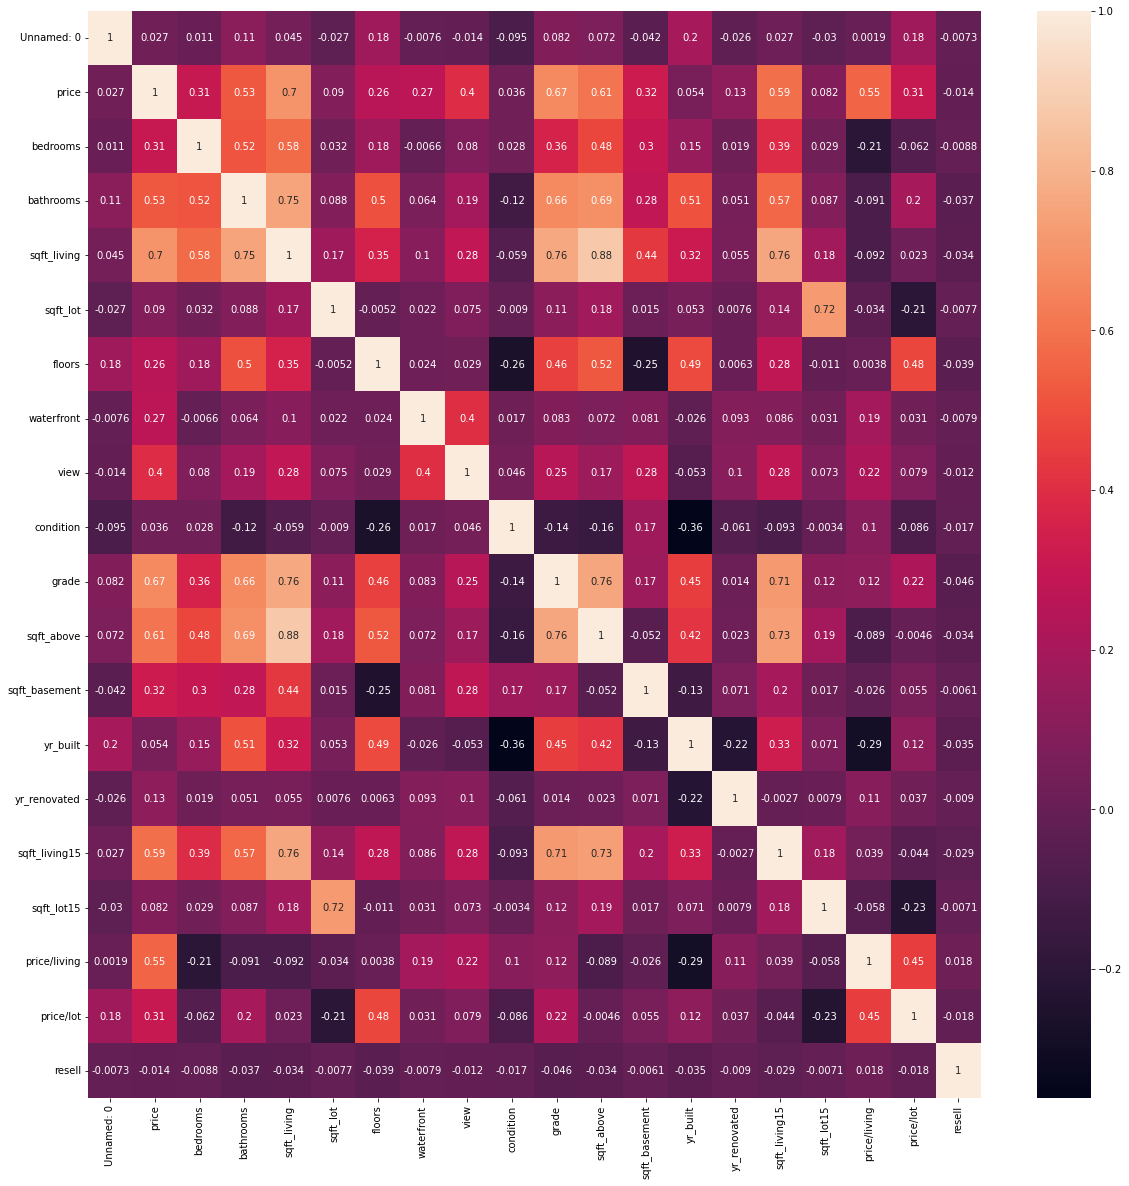

In [118]:
#lucas
# vendo a correlação das variaveis em um graficor de cores
plt.figure(figsize = (20,20))
sns.heatmap(numdf.corr(),  annot=True)

Unnamed: 0     price  bedrooms  bathrooms  sqft_living  \
Unnamed: 0       1.000000  0.031693  0.006075   0.109351     0.042197   
price            0.031693  1.000000  0.296956   0.455927     0.622333   
bedrooms         0.006075  0.296956  1.000000   0.493044     0.584609   
bathrooms        0.109351  0.455927  0.493044   1.000000     0.716684   
sqft_living      0.042197  0.622333  0.584609   0.716684     1.000000   
sqft_lot        -0.029204  0.093950  0.023992   0.064896     0.158850   
floors           0.188960  0.248508  0.134316   0.523132     0.342741   
waterfront       0.000115  0.051449 -0.030550  -0.003651     0.001844   
view            -0.017721  0.238268  0.038385   0.096833     0.168774   
condition       -0.094647  0.038275  0.026833  -0.135490    -0.072131   
grade            0.084841  0.631182  0.322541   0.614698     0.705620   
sqft_above       0.072307  0.530451  0.463458   0.638181     0.853561   
sqft_basement   -0.048635  0.235701  0.283360   0.222877     0.376601   
yr_built         0.198431  0.061144  0.159359   0.543318     0.353754   
yr_renovated    -0.022994  0.083601  0.004063   0.025696     0.020877   
sqft_living15    0.028618  0.562090  0.371076   0.528845     0.738190   
sqft_lot15      -0.032546  0.082420  0.020622   0.064566     0.172291   
price/living    -0.001813  0.465562 -0.307482  -0.253389    -0.329769   
price/lot        0.189600  0.301536 -0.103879   0.166241    -0.065235   
resell          -0.006403 -0.015247 -0.006072  -0.038102    -0.038039   

               sqft_lot    floors  waterfront      view  condition     grade  \
Unnamed: 0    -0.029204  0.188960    0.000115 -0.017721  -0.094647  0.084841   
price          0.093950  0.248508    0.051449  0.238268   0.038275  0.631182   
bedrooms       0.023992  0.134316   -0.030550  0.038385   0.026833  0.322541   
bathrooms      0.064896  0.523132   -0.003651  0.096833  -0.135490  0.614698   
sqft_living    0.158850  0.342741    0.001844  0.168774  -0.072131  0.705620   
sqft_lot       1.000000 -0.022303    0.024765  0.078493  -0.003344  0.093201   
floors        -0.022303  1.000000   -0.003490 -0.014617  -0.305018  0.475784   
waterfront     0.024765 -0.003490    1.000000  0.294325   0.014142 -0.013252   
view           0.078493 -0.014617    0.294325  1.000000   0.034972  0.132704   
condition     -0.003344 -0.305018    0.014142  0.034972   1.000000 -0.167572   
grade          0.093201  0.475784   -0.013252  0.132704  -0.167572  1.000000   
sqft_above     0.162479  0.524110   -0.005489  0.067272  -0.177833  0.710093   
sqft_basement  0.012009 -0.282657    0.013254  0.200095   0.179565  0.074052   
yr_built       0.043065  0.599340   -0.038959 -0.065981  -0.353447  0.491533   
yr_renovated   0.010695 -0.015998    0.059733  0.062833  -0.060215 -0.019778   
sqft_living15  0.142829  0.289681    0.004481  0.187538  -0.117745  0.671115   
sqft_lot15     0.710757 -0.024656    0.031093  0.075686   0.001100  0.102193   
price/living  -0.046117 -0.076683    0.066680  0.090819   0.098582 -0.042686   
price/lot     -0.210423  0.452054   -0.012521  0.017268  -0.103586  0.177202   
resell        -0.009813 -0.039135   -0.004989 -0.016258  -0.020191 -0.052753   

               sqft_above  sqft_basement  yr_built  yr_renovated  \
Unnamed: 0       0.072307      -0.048635  0.198431     -0.022994   
price            0.530451       0.235701  0.061144      0.083601   
bedrooms         0.463458       0.283360  0.159359      0.004063   
bathrooms        0.638181       0.222877  0.543318      0.025696   
sqft_living      0.853561       0.376601  0.353754      0.020877   
sqft_lot         0.162479       0.012009  0.043065      0.010695   
floors           0.524110      -0.282657  0.599340     -0.015998   
waterfront      -0.005489       0.013254 -0.038959      0.059733   
view             0.067272       0.200095 -0.065981      0.062833   
condition       -0.177833       0.179565 -0.353447     -0.060215   
grade            0.710093       0.074052  0.491533  

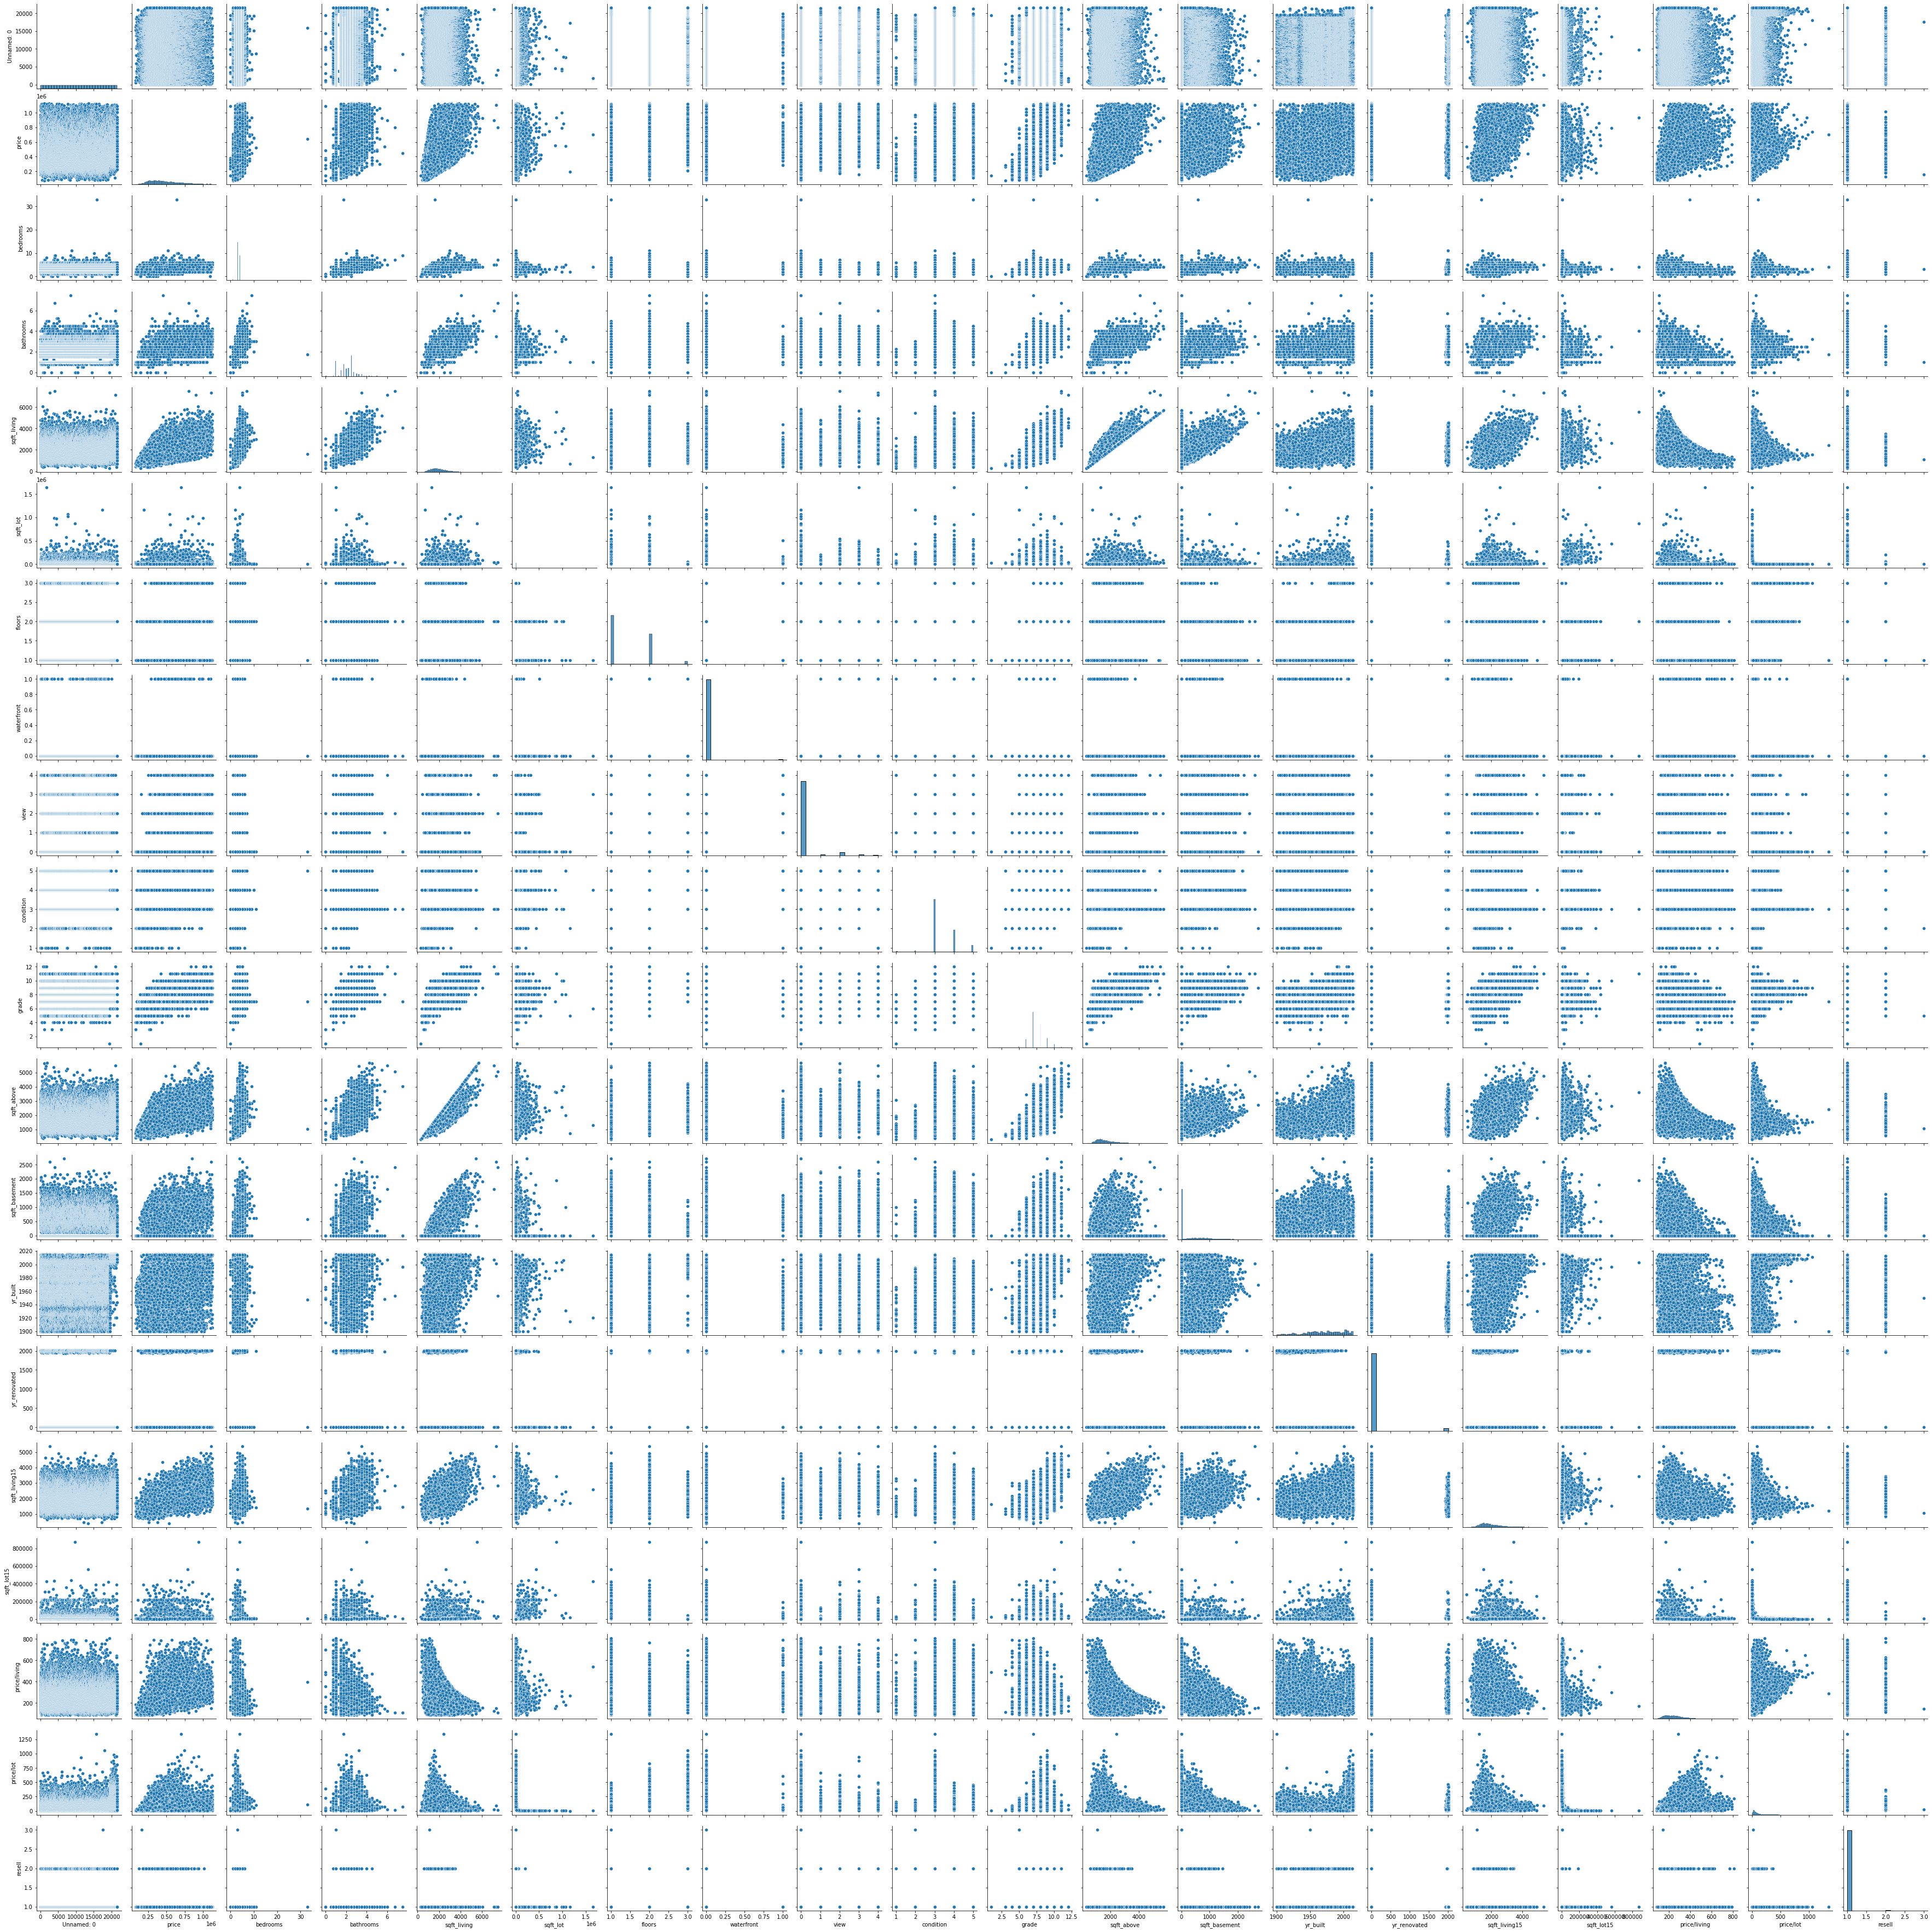

In [79]:
#grafico e dataframe com todas as correlações
sns.pairplot(df_new)
df_new.corr()



In [19]:
numdf.corr()['price']

Unnamed: 0       0.027372
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
sqft_living15    0.585379
sqft_lot15       0.082447
price/living     0.554703
price/lot        0.307849
resell          -0.013644
Name: price, dtype: float64

In [77]:
df_new['floors'] = df_new['floors'].astype(np.int64)


In [78]:
df_new.corr()['price']

Unnamed: 0       0.031693
price            1.000000
bedrooms         0.296956
bathrooms        0.455927
sqft_living      0.622333
sqft_lot         0.093950
floors           0.248508
waterfront       0.051449
view             0.238268
condition        0.038275
grade            0.631182
sqft_above       0.530451
sqft_basement    0.235701
yr_built         0.061144
yr_renovated     0.083601
sqft_living15    0.562090
sqft_lot15       0.082420
price/living     0.465562
price/lot        0.301536
resell          -0.015247
Name: price, dtype: float64

#colunas que tem maior correlação com o preço:
#bathrooms, sqft_living, grade, sqft_above, sqft_living15

#Gráfico da disperção do preço baseado na latitude e longitude

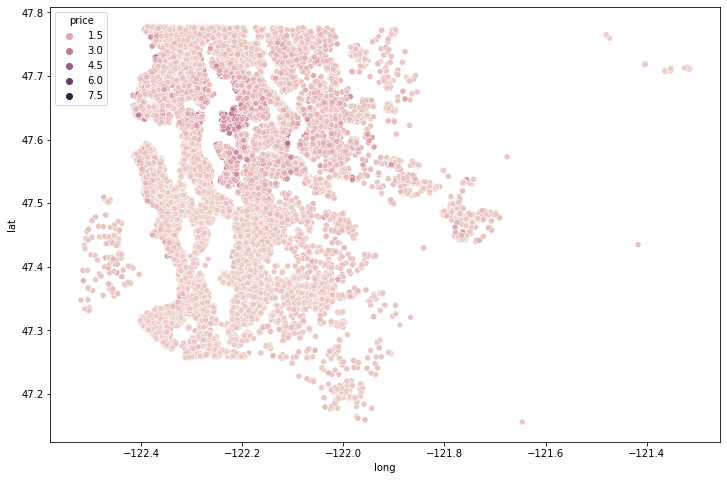

In [20]:
#lucas
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [ ]:

plt.scatter(df_new['floors'], df_new['bathrooms'])
plt.xlabel('preço')
plt.ylabel('banheiro')
np.corrcoef(df_new['price'],df_new['bathrooms'])
np.corrcoef(df_new['price'],df_new['bathrooms'])

array([[1.        , 0.45592735],
       [0.45592735, 1.        ]])

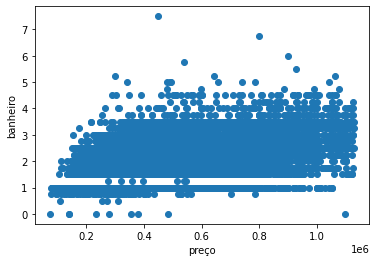

In [75]:

plt.scatter(df_new['price'], df_new['bathrooms'])
plt.xlabel('preço')
plt.ylabel('banheiro')
np.corrcoef(df_new['price'],df_new['bathrooms'])
np.corrcoef(df_new['price'],df_new['bathrooms'])


Text(0, 0.5, 'banheiros')

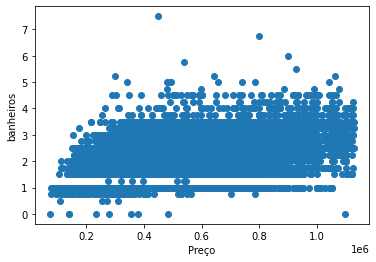

In [65]:
fig = plt.figure()
plt.scatter(df_new['price'],df_new['bathrooms'])
plt.xlabel('Preço')
plt.ylabel('banheiros')

Text(0, 0.5, 'banheiros')

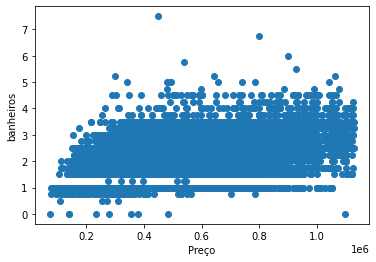

In [121]:
#Preço X banheiros
fig = plt.figure()
plt.scatter(df_new['price'],df_new['bathrooms'])
plt.xlabel('Preço')
plt.ylabel('banheiros')


Text(0, 0.5, 'Area habitável')

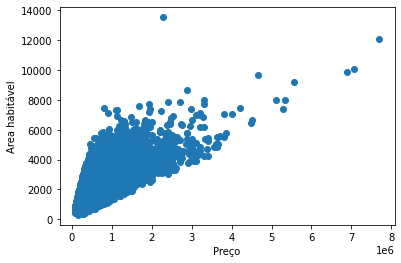

In [22]:
#preço X Area Habitavel
fig = plt.figure()
plt.scatter(numdf['price'],numdf['sqft_living'])
plt.xlabel('Preço')
plt.ylabel('Area habitável')

Text(0, 0.5, 'Qualidade dos materiais')

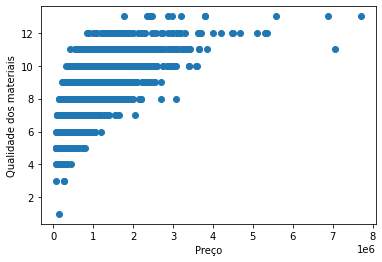

In [23]:
#preço X qualidade
fig = plt.figure()
plt.scatter(numdf['price'],numdf['grade'])
plt.xlabel('Preço')
plt.ylabel('Qualidade dos materiais')

Text(0, 0.5, 'Area habitavel acima do terreno')

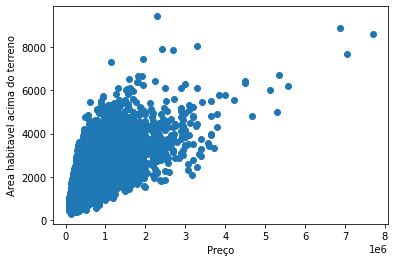

In [24]:
#preço X area acima do terreno
fig = plt.figure()
plt.scatter(numdf['price'],numdf['sqft_above'])
plt.xlabel('Preço')
plt.ylabel('Area habitavel acima do terreno')

Text(0, 0.5, 'Area Habitavel dos 15 terrenos mais próximos')

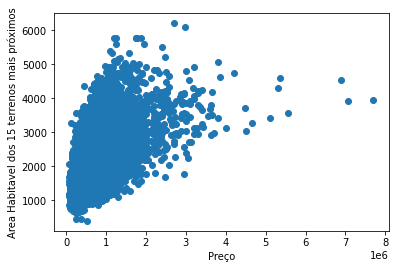

In [25]:
#Preço X area habitavel dos 15 imoveis mais proximos
fig = plt.figure()
plt.scatter(numdf['price'],numdf['sqft_living15'])
plt.xlabel('Preço')
plt.ylabel('Area Habitavel dos 15 terrenos mais próximos')


{'boxes': [<matplotlib.lines.Line2D at 0x7f8a454dc9d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8a454e29d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8a454e7f50>],
 'means': [<matplotlib.lines.Line2D at 0x7f8a454e7a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8a454e74d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8a454dcf10>,
  <matplotlib.lines.Line2D at 0x7f8a454e2490>]}

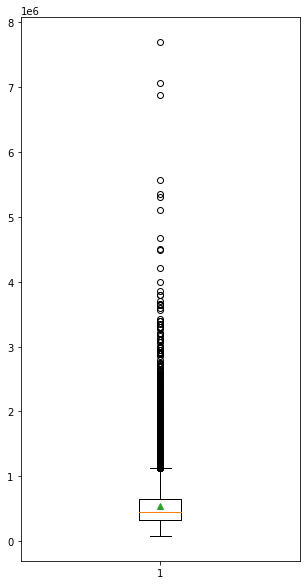

In [26]:
fig = plt.figure(figsize=(5,10))
plt.boxplot(numdf['price'],showmeans=True)

#Diferença nos dados sem outliers / com outliers

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f8a430fef90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8a4310af90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8a43097550>,
 'means': [<matplotlib.lines.Line2D at 0x7f8a43091fd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8a43091a90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8a4310a510>,
  <matplotlib.lines.Line2D at 0x7f8a430a1550>]}

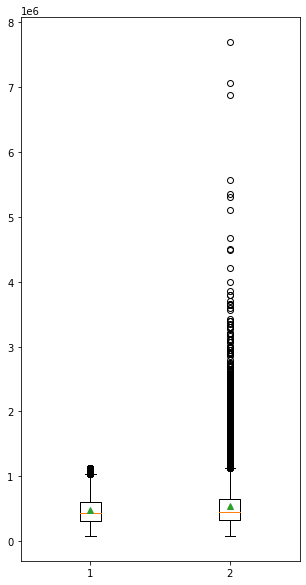

In [52]:
#lucas
fig = plt.figure(figsize=(5,10))
plt.boxplot([df_new['price'],df['price']],showmeans=True)

Text(0, 0.5, 'Frequência')

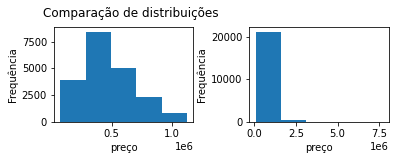

In [155]:
fig = plt.figure()
plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
fig.suptitle('Comparação de distribuições', x=0.1, y=.95, horizontalalignment = 'left', verticalalignment = 'top')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

# Cria os gráficos de histograma e acerta os nomes dos eixos
ax1.hist(df_new['price'], bins = 5)
ax1.set_xlabel('preço')
ax1.set_ylabel('Frequência')

ax2.hist(numdf['price'], bins = 5)
ax2.set_xlabel('preço')
ax2.set_ylabel('Frequência')

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

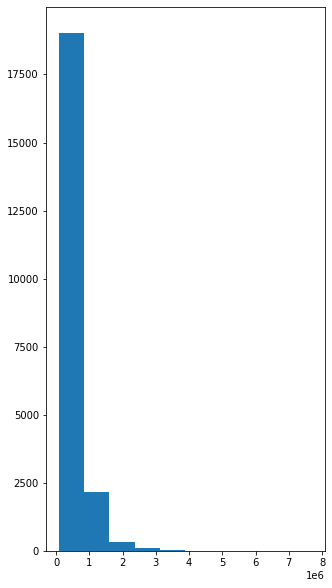

In [54]:
fig = plt.figure(figsize=(5,10))
plt.hist(numdf['price'])

fazer separaçao dos zipcode para avaliar as areas que tem mais valorização

calcular a media do preço de cada area zip
pegar os 10 maiores valores e os 10 menores valores
comparar a regiao para verificar as maiores e menores medias 

In [108]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [156]:
df['zipcode'].value_counts()
#.mean().round(decimals=0)
df_zip = df.loc[df['zipcode'] == 98103]
jesusajuda = df_zip['price']
jesusajuda2 = jesusajuda.mean()
jesusajuda2.round()

AttributeError: ignored

#Calculando o lucro e a perda quando um imóvel foi vendido mais de uma vez
#criar graficos e dataframes para deixar claro e visivel

In [106]:
# para cada imovel no dataframe:
#se o valor na coluna resell for =2, diminuir o valor da coluna preço pelo valor na coluna preço quando o resell for =1 com o mesmo id 
#se o valor na coluna resell for = 3, diminuir o valor na coluna preço pelo valor na coluna preço quando o resell for =2 com o mesmo id
#diminuir o preço pelo preço do mesmo imovel que apareceu antes(usando id para identificar)

df['resell'] = df['resell'].astype(int)

df['resell'].value_counts()

1    21436
2      176
3        1
Name: resell, dtype: int64

In [111]:
	df[df['id'] == 795000620].drop(['id','zipcode', 'lat','long', 'address','number','street','district','city','county', 'state','number2','country','x','y'],axis = 1)

Unnamed: 0             date   price  bedrooms  bathrooms  sqft_living  \
17602       17602  20140924T000000  115000         3        1.0         1080   
17603       17603  20141215T000000  124000         3        1.0         1080   
17604       17604  20150311T000000  157000         3        1.0         1080   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
17602      6250     1.0           0     0  ...      5        1080   
17603      6250     1.0           0     0  ...      5        1080   
17604      6250     1.0           0     0  ...      5        1080   

       sqft_basement  yr_built  yr_renovated  sqft_living15  sqft_lot15  \
17602              0      1950             0           1070        6250   
17603              0      1950             0           1070        6250   
17604              0      1950             0           1070        6250   

       price/living  price/lot  resell  
17602    106.481481      18.40       1  
17603    114.814815      19.84       2  
17604    145.370370      25.12       3  

[3 rows x 21 columns]

In [109]:
df[df['resell'] == 3]

Unnamed: 0         id             date   price  bedrooms  bathrooms  \
17604       17604  795000620  20150311T000000  157000         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  ...      city        county  \
17604         1080      6250     1.0           0  ...   Seattle   King County   

             state  number2         country     x     y  price/living  \
17604   Washington    98168   United States  None  None     145.37037   

       price/lot  resell  
17604      25.12       3  

[1 rows x 36 columns]

In [ ]:
# teste de um id entre os que apareceram mais de 1 vez
df.loc[df['id']==6021501535]


Unnamed: 0          id             date   price  bedrooms  bathrooms  \
93          93  6021501535  20140725T000000  430000         3        1.5   
94          94  6021501535  20141223T000000  700000         3        1.5   

    sqft_living  sqft_lot  floors  waterfront  ...      city    county  \
93         1580      5000     1.0           0  ...   Ballard   Seattle   
94         1580      5000     1.0           0  ...   Ballard   Seattle   

           state      number2  country               x     y  price/living  \
93   King County   Washington    98117   United States  None    272.151899   
94   King County   Washington    98117   United States  None    443.037975   

    price/lot  resell  
93       86.0       1  
94      140.0       2  

[2 rows x 36 columns]

In [107]:
df['zipcode'].count()


21613

# Dado os lucros/perdas, comparar com casas com as mesmas caracteristicas, que so apareceram uma vez, para predizer lucros/perdas e descobrir as melhores/piores

#Obs talves tenha casas que dão maiores lucros/perdas mesmo estando em areas distantes e com caracteristicas diferentes da amostra tirada baseada nas que apareceram mais de uma vez (amostra muito pequena 177/21613)
#Discutir a necessidade de outras formas para classificar as melhores e piores(atenção nos dados de area, condição da casa, vista e outros relevantes)

#removendo valores qualitativos

#Gráficos:

muitas informaçõeos tendo muito outliers, necessario redução dos dados, para poder avaliar com mais acuracy (ja filtrados pelo lucro/perda dos vendidos mais de uma vez?)

SyntaxError: ignored

In [ ]:
#fazendo um gráfico scatter para verificar 

In [ ]:
df

NameError: ignored

--------------------------------------------------------------------------------

In [ ]:
#correlacionar as colunas
#sns.pairplot(df)

In [ ]:
#como conseguir um valor de uma linha/coluna determinando uma coluna


#def variacao(val1,val2):
  #val1 = df['price'][index(df[''])]

In [ ]:
for x in df:
  if df['resell']>1:
    df['price'][-1] - df['price'][-2]



ValueError: ignored

In [ ]:
#diminuir o valor do preço da venda mais recente pela venda anterior(msmo imóvel)
revenda = list()
for x in df['id']:
  revenda.append(df.loc[df['id'] == x])
revenda
from tqdm import tqdm

pbar = tqdm()


KeyboardInterrupt: ignored

In [ ]:
for x in repetido:
  casas_revendidas.append(df.loc[df['id'] == x])
#pd.DataFrame(casas_revendidas)
casas_revendidas

In [ ]:
df.describe()

In [ ]:
#descrever so uma vez as id repetidas
juntar = list()
for x in repetido:
  if x not in juntar:
    juntar.append(x)
juntar

ValueError: ignored

In [ ]:
#df com as residencias repetidas:
df['id'] == repetido

ValueError: ignored

In [ ]:
df.corr()

In [ ]:
variave1 = list()
for x in df.index:
  print(x)

In [ ]:
#for x,y in zip(dados['lat'],dados['long']):
  #geolocator.reverse(str(dados['lat'][x])+','+str(dados['long'][y]))

KeyError: ignored

In [ ]:
#for x,y in zip(dados['lat'],dados['long']):
  #geolocator.reverse(str(x)+','+str(y))

KeyboardInterrupt: ignored

In [ ]:
#função para colocar o endereço
#def endereco(df):
  #address = geolocator.reverse(str(df['lat'])+','+str(df['long']))
  #return address

  

In [ ]:
#colocando o endereço no dataframe
#dados['address'] = dados.apply(endereco,axis=1)
#endereco(dados)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/base.py:256: UserWarning: Unable to parse the string as Point: "Failed to create Point instance from string: unknown format.". Using the value as-is for the query. In geopy 2.0 this will become an exception.
  'exception.' % str(e), UserWarning


ValueError: ignored

In [ ]:
#geolocator = Nominatim(user_agent="geoapiExercises")
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
#dados['address'] = geolocator.reverse(str(dados['lat'])+','+str(dados['long']))

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/base.py:256: UserWarning: Unable to parse the string as Point: "Failed to create Point instance from string: unknown format.". Using the value as-is for the query. In geopy 2.0 this will become an exception.
  'exception.' % str(e), UserWarning


ValueError: ignored

In [ ]:
#dados

In [ ]:
#!pip install geopandas
#!pip install plotly_express

In [ ]:

#import pandas as pd
#import geopandas as gpd
#import geopy
#from geopy.geocoders import Nominatim
#from geopy.extra.rate_limiter import RateLimiter
#import matplotlib.pyplot as plt
#import plotly_express as px
#import tqdm
#from tqdm.notebook import tqdm_notebook

In [ ]:
#locator = Nominatim(user_agent="myGeocoder")
#coordinates = (dados['lat'], dados['long'])
#coordinates
#cidades = locator.reverse(coordinates)
#cidades.raw

In [ ]:
#ende = list()
#for x,y in zip(dados['lat'],dados['long']):
  #ende.append(geolocator.reverse(str(x)+','+str(y))
#ende


SyntaxError: ignored